# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.114588e+01     8.059723e+00
 * time: 0.0016679763793945312
     1     3.080368e+01     5.408165e+00
 * time: 0.00695490837097168
     2     2.011985e+01     4.137801e+00
 * time: 0.014233827590942383
     3     1.504417e+01     3.777711e+00
 * time: 0.020946025848388672
     4     1.495037e+01     4.508940e+00
 * time: 0.02512979507446289
     5     1.168958e+01     2.240972e+00
 * time: 0.032106876373291016
     6     1.068515e+01     2.795656e+00
 * time: 0.03760886192321777
     7     9.675650e+00     1.674195e+00
 * time: 0.04353189468383789
     8     9.123354e+00     9.930072e-01
 * time: 0.09646987915039062
     9     8.880089e+00     9.545346e-01
 * time: 0.10011887550354004
    10     8.707977e+00     6.835513e-01
 * time: 0.10346102714538574
    11     8.566270e+00     6.327834e-01
 * time: 0.10671496391296387
    12     8.402808e+00     4.412330e-01
 * time: 0.11010599136352539
    13     8.288841e+00     4.705052e-01
 * 

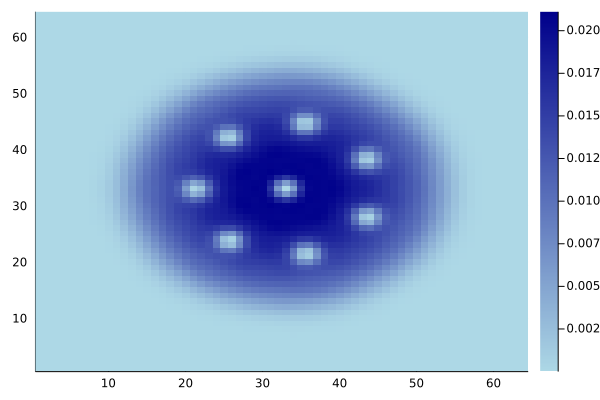

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)